In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from prince import PCA as prince_PCA  # Rename to avoid conflict with scikit-learn PCA
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.cluster import AgglomerativeClustering

In [2]:
pylum = pd.read_csv('../../data/raw/illumina/Pylum-level microbiota.csv')
pylum.head(10)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Deferribacteres,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0020,0.0000,0.0020
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0007,0.0037,0.0000,0.0000,0.0022,0.0000,0.0,0.0007,0.0000,0.0000
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0407,0.0000,0.0,0.0051,0.0000,0.0000
5,UAB 17006,74.4002,10.1792,13.0713,0.0112,0.2280,0.0273,0.0273,0.0048,0.0000,...,0.0016,0.0000,0.0000,0.0000,0.0000,0.1076,0.0,0.0000,0.0032,0.0000
6,UAB 17007,63.0646,0.7472,5.3379,21.2978,0.5354,0.0013,0.0039,0.0013,0.0013,...,0.0000,0.0013,0.0000,0.0000,0.0013,0.0000,0.0,0.0000,0.0000,0.0013
7,UAB 17008,73.9986,9.8571,9.1169,0.0171,2.7578,0.0613,0.0951,0.1077,0.0008,...,0.0020,0.0179,0.0004,0.0004,0.0012,0.0000,0.0,0.0000,0.0000,0.0004
8,UAB 17009,64.7139,1.6725,2.9357,0.0051,11.4486,0.0288,0.0826,0.0023,0.0000,...,0.0017,0.0051,0.0000,0.0000,0.0006,0.0000,0.0,0.0006,0.0006,0.0006
9,UAB 17010,59.5769,28.7744,5.7057,0.0856,3.9442,0.0084,0.4506,0.0365,0.0000,...,0.0126,0.0000,0.0000,0.0014,0.0014,0.0000,0.0,0.0000,0.0000,0.0028


In [3]:
# Describe the statistical summary of the DataFrame.
pylum.describe()

,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,Chloroflexi,...,Deferribacteres,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000
mean,58.664130,19.061948,8.003034,2.249039,5.340596,0.036091,0.069654,0.017595,0.001879,0.003155,...,0.023936,0.002737,0.000366,0.000207,0.002404,0.009216,0.000214,0.00023,0.000273,0.000293
std,18.581490,14.796855,6.502343,7.074382,7.852858,0.044794,0.099641,0.030955,0.009969,0.004089,...,0.087450,0.004588,0.001022,0.000517,0.007426,0.053317,0.000918,0.00076,0.001299,0.000723
min,8.419600,0.747200,0.178500,0.000000,0.016100,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,50.852225,8.650550,3.138875,0.006975,0.396575,0.008625,0.006050,0.001825,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,62.216850,15.537350,5.759550,0.013350,2.223050,0.022700,0.034850,0.005700,0.000000,0.001600,...,0.000650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,72.644350,27.127925,11.545400,0.034550,6.145375,0.048775,0.093600,0.017225,0.000725,0.004750,...,0.003225,0.004125,0.000000,0.000000,0.001225,0.000350,0.000000,0.00000,0.000000,0.000000
max,88.632700,61.718200,33.209900,36.628700,27.528900,0.239800,0.450600,0.136900,0.074600,0.017700,...,0.577900,0.017900,0.006000,0.002100,0.040700,0.386600,0.005800,0.00510,0.009200,0.002900


In [4]:
# check for any null values
pylum.isnull().sum()

Sample ID                          0
Firmicutes                         0
Proteobacteria                     0
Actinobacteria                     0
Tenericutes                        0
Bacteroidetes                      0
Armatimonadetes                    0
Spirochaetes                       0
Planctomycetes                     0
Verrucomicrobia                    0
Chloroflexi                        0
Chrysiogenetes                     0
Aquificae                          0
Fusobacteria                       0
Chlorobi                           0
Gemmatimonadetes                   0
Synergistetes                      0
Thermotogae                        0
Candidatus.Bipolaricaulota         0
Candidatus.Saccharibacteria        0
Deinococcus.Thermus                0
Cyanobacteria                      0
Deferribacteres                    0
Dictyoglomi                        0
Balneolaeota                       0
Fibrobacteres                      0
Chlamydiae                         0
A

In [5]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
pylum['fertility'] = pylum['Sample ID'].str.split(' ').str[0]

pylum_fertile = pylum[pylum['fertility'] == 'CON']
pylum_fertile.drop(['fertility'], axis=1, inplace=True)

pylum_infertile = pylum[pylum['fertility'] == 'UAB']
pylum_infertile.drop(['fertility'], axis=1, inplace=True)

/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/1650805334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pylum_fertile.drop(['fertility'], axis=1, inplace=True)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/1650805334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pylum_infertile.drop(['fertility'], axis=1, inplace=True)


In [6]:
pylum_fertile.head(5)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Deferribacteres,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria
42,CON 01,60.5609,8.7443,5.3618,0.0047,23.9903,0.0334,0.0101,0.0342,0.0000,...,0.0008,0.0062,0.000,0.0,0.0031,0.0000,0.0,0.0,0.0,0.0000
43,CON 02,70.9169,8.3693,15.3492,0.0167,0.6654,0.0167,0.0377,0.0042,0.0000,...,0.0000,0.0000,0.000,0.0,0.0084,0.0000,0.0,0.0,0.0,0.0000
44,CON 03,76.9341,10.6578,9.6086,0.0044,0.2395,0.0087,0.0087,0.0044,0.0000,...,0.0000,0.0000,0.000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
45,CON 04,60.8265,9.7579,4.7338,17.0491,0.4081,0.0076,0.0015,0.0030,0.0015,...,0.0000,0.0000,0.006,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
46,CON 05,76.7730,8.8925,7.5330,0.0105,2.6526,0.0477,0.0931,0.0672,0.0008,...,0.0016,0.0073,0.000,0.0,0.0000,0.0008,0.0,0.0,0.0,0.0008


In [7]:
pylum_infertile.head(5)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Deferribacteres,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0020,0.0,0.002
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0007,0.0037,0.0,0.0,0.0022,0.0,0.0,0.0007,0.0,0.000
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0000,0.0000,0.0,0.0,0.0407,0.0,0.0,0.0051,0.0,0.000


In [8]:
# shape of fertile and infertile df
print('Fertile: ', pylum_fertile.shape)
print('Infertile: ', pylum_infertile.shape)

Fertile:  (14, 32)
Infertile:  (42, 32)


## Pylum fertile

### PCA

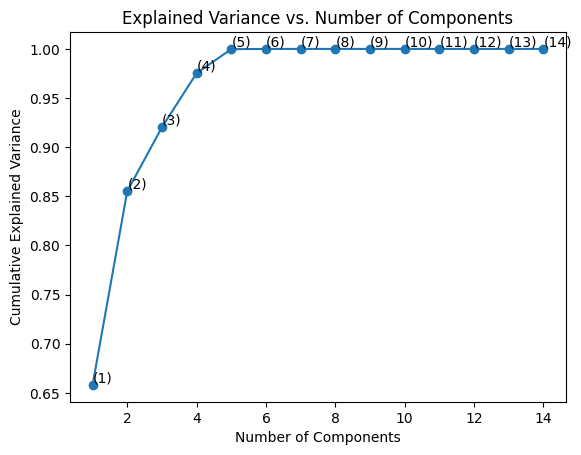

In [9]:
features = pylum_fertile.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [10]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

### KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

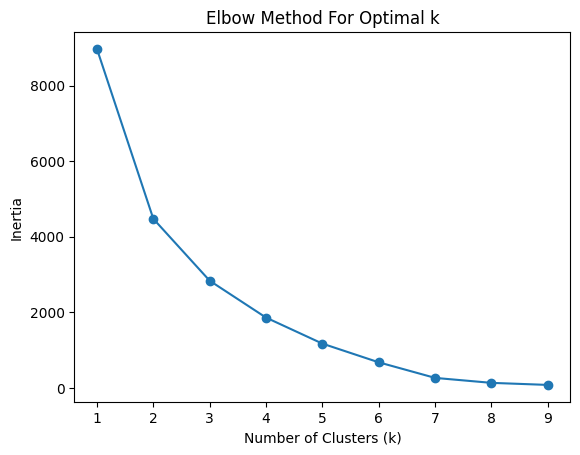

In [11]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/810513172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pylum_fertile['cluster'] = cluster_labels


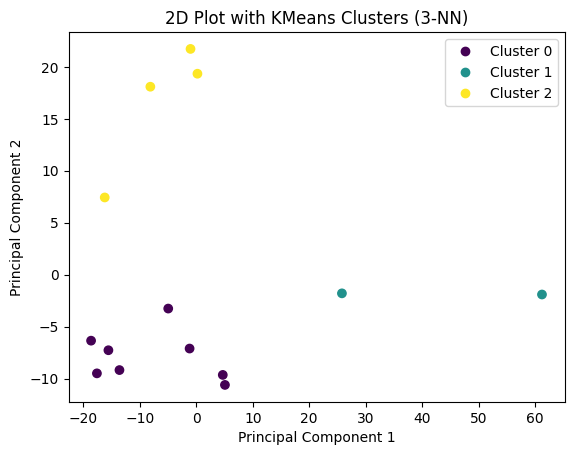

In [12]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
pylum_fertile['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [13]:
# see how many samples are in each cluster
pylum_fertile['cluster'].value_counts()

cluster
0    8
2    4
1    2
Name: count, dtype: int64

### Analysis

In [14]:
# statistics of each cluster
pylum_fertile.groupby('cluster').describe()

Firmicutes                                                      \
             count       mean        std      min        25%       50%   
cluster                                                                  
0              8.0  69.300350   5.962318  60.8265  65.162050  68.72745   
1              2.0  29.979900  17.799575  17.3937  23.686800  29.97990   
2              4.0  59.540725   4.997412  55.6195  55.740475  58.17085   

                            Proteobacteria             ...  \
               75%      max          count       mean  ...   
cluster                                                ...   
0        73.754925  76.9341            8.0  16.617812  ...   
1        36.273000  42.5661            2.0  49.500400  ...   
2        61.971100  66.2017            4.0   9.828025  ...   

        candidate.division.Zixibacteria      Thermodesulfobacteria          \
                                    75%  max                 count    mean   
cluster                                                                      
0                                   0.0  0.0                   8.0  0.0001   
1                                   0.0  0.0                   2.0  0.0000   
2                                   0.0  0.0                   4.0  0.0000   

                                               
              std  min  25%  50%  75%     max  
cluster                                        
0        0.000283  0.0  0.0  0.0  0.0  0.0008  
1        0.000000  0.0  0.0  0.0  0.0  0.0000  
2        0.000000  0.0  0.0  0.0  0.0  0.0000  

[3 rows x 248 columns]

/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/2951459790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=features_with_cluster, ax=axes[i], palette='viridis')
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/2951459790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=features_with_cluster, ax=axes[i], palette='viridis')
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/2951459790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxpl

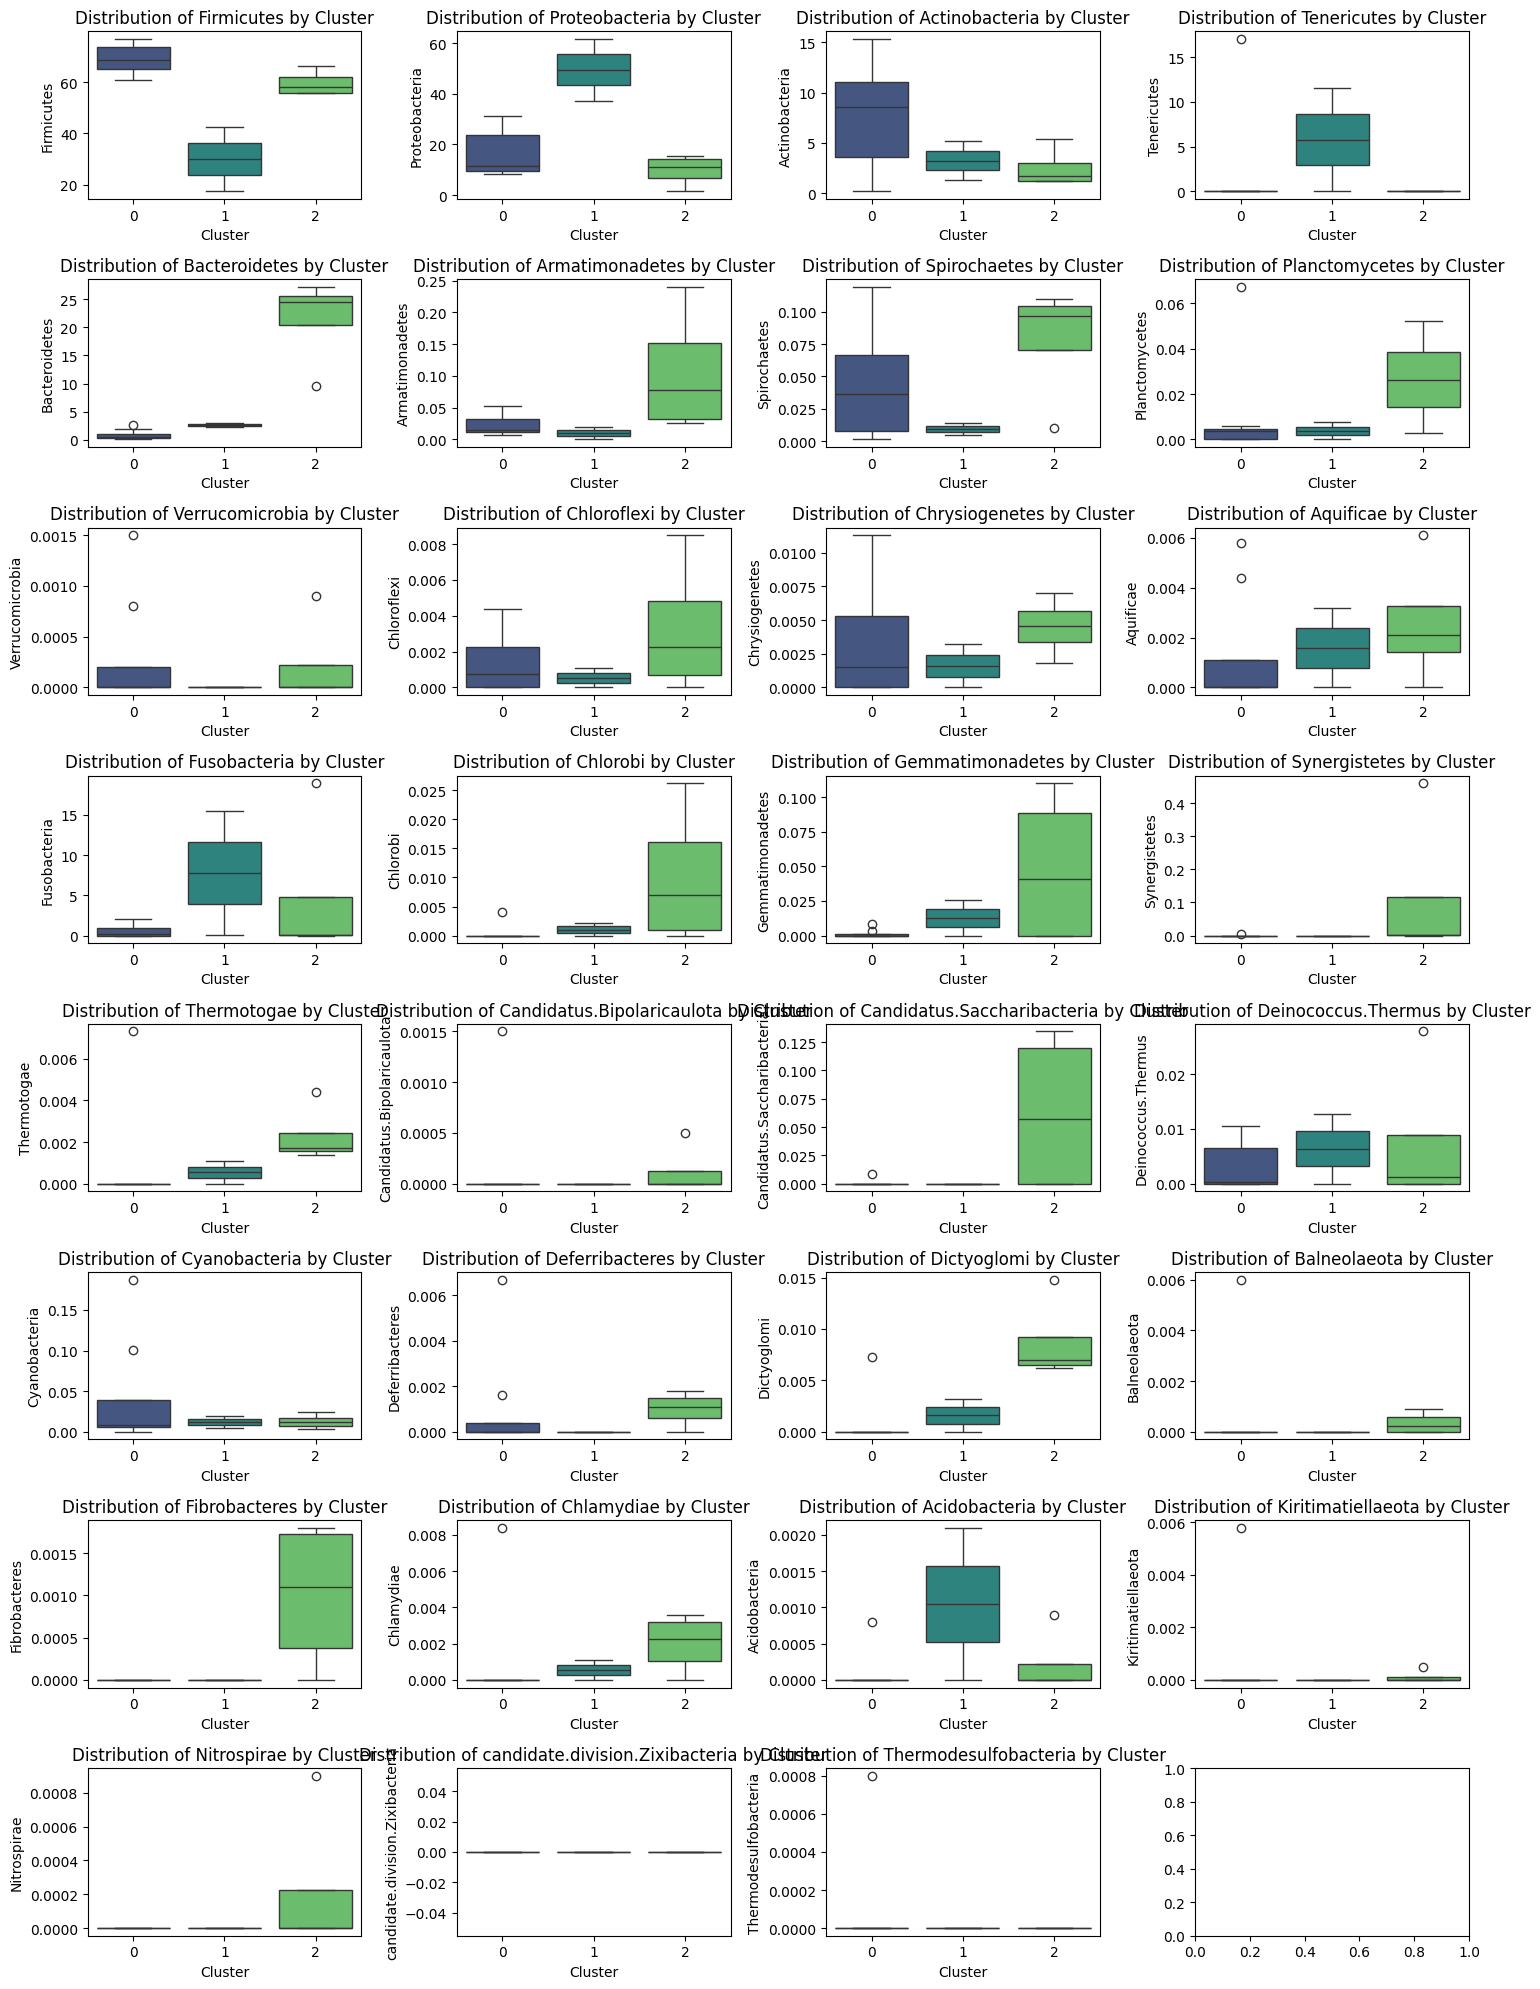

In [15]:
# Create a DataFrame with features and cluster labels
features_with_cluster = pylum_fertile

# Specify the number of rows and columns for the subplots
num_rows = 8  # Adjust based on the number of features and your preferences
num_cols = 4

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot box plots for each feature in each cluster
for i, feature in enumerate(features.columns):
    sns.boxplot(x='cluster', y=feature, data=features_with_cluster, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### KNN

In [16]:
# Assuming your data has cluster assignments in 'cluster' column
X = pylum_fertile.iloc[:, 1:]  # Features
y = pylum_fertile['cluster']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.0
Confusion Matrix:
[[0 0]
 [3 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

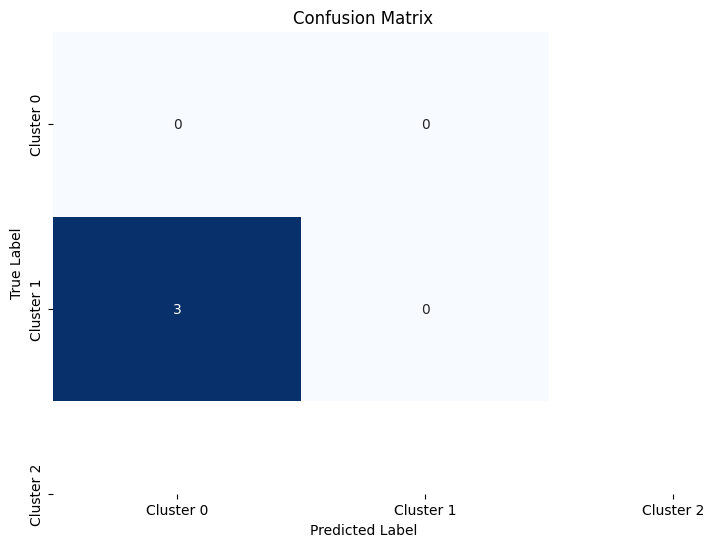

Accuracy: 0.0
Confusion Matrix:
[[0 0]
 [3 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [17]:
# Assuming your data has cluster assignments in 'cluster' column
X = features_pca  # Features after applying PCA
y = cluster_labels  # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

## Pylum infertile

### PCA

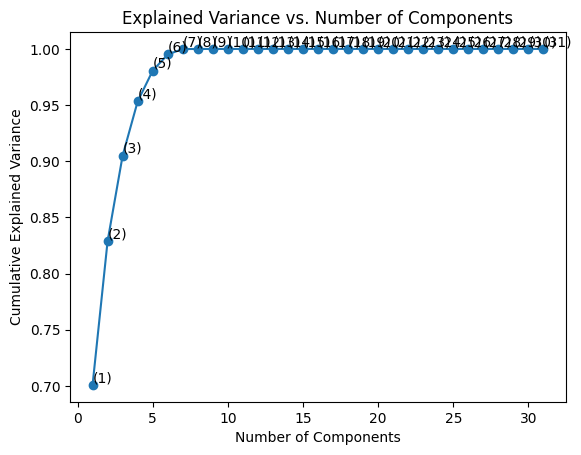

In [18]:
features = pylum_infertile.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [19]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

### KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

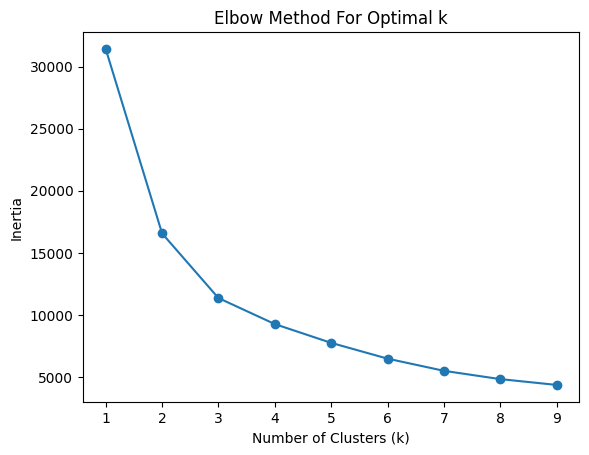

In [20]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/1926389163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pylum_infertile['cluster'] = cluster_labels


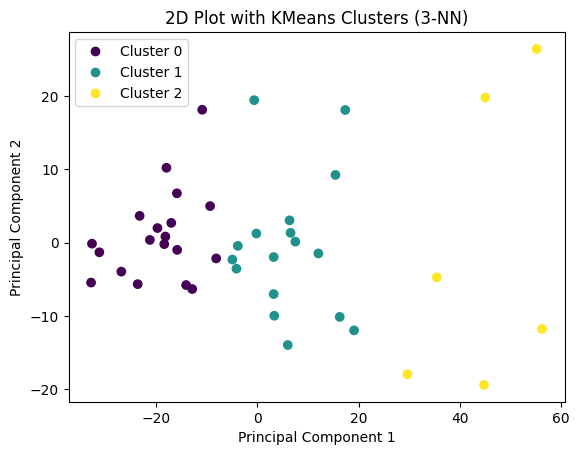

In [21]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
pylum_infertile['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [22]:
# see how many samples are in each cluster
pylum_infertile['cluster'].value_counts()

cluster
0    19
1    17
2     6
Name: count, dtype: int64

### Analysis

In [23]:
# statistics of each cluster
pylum_infertile.groupby('cluster').describe()

Firmicutes                                                     \
             count       mean        std      min       25%       50%   
cluster                                                                 
0             19.0  73.894753   7.937747  60.5104  68.67745  73.13490   
1             17.0  52.310659   9.227664  29.1573  46.52960  53.06550   
2              6.0  23.230717  11.595541   8.4196  16.03650  22.34285   

                            Proteobacteria             ...  \
               75%      max          count       mean  ...   
cluster                                                ...   
0        78.887550  88.6327           19.0   7.970858  ...   
1        58.986400  64.3925           17.0  22.149335  ...   
2        29.415925  40.5710            6.0  44.704783  ...   

        candidate.division.Zixibacteria         Thermodesulfobacteria  \
                                    75%     max                 count   
cluster                                                                 
0                                   0.0  0.0032                  19.0   
1                                   0.0  0.0092                  17.0   
2                                   0.0  0.0000                   6.0   

                                                             
             mean       std  min  25%  50%      75%     max  
cluster                                                      
0        0.000358  0.000707  0.0  0.0  0.0  0.00045  0.0027  
1        0.000400  0.000960  0.0  0.0  0.0  0.00000  0.0029  
2        0.000333  0.000816  0.0  0.0  0.0  0.00000  0.0020  

[3 rows x 248 columns]

/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/2889483552.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=features_with_cluster, ax=axes[i], palette='viridis')
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/2889483552.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=features_with_cluster, ax=axes[i], palette='viridis')
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_7343/2889483552.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxpl

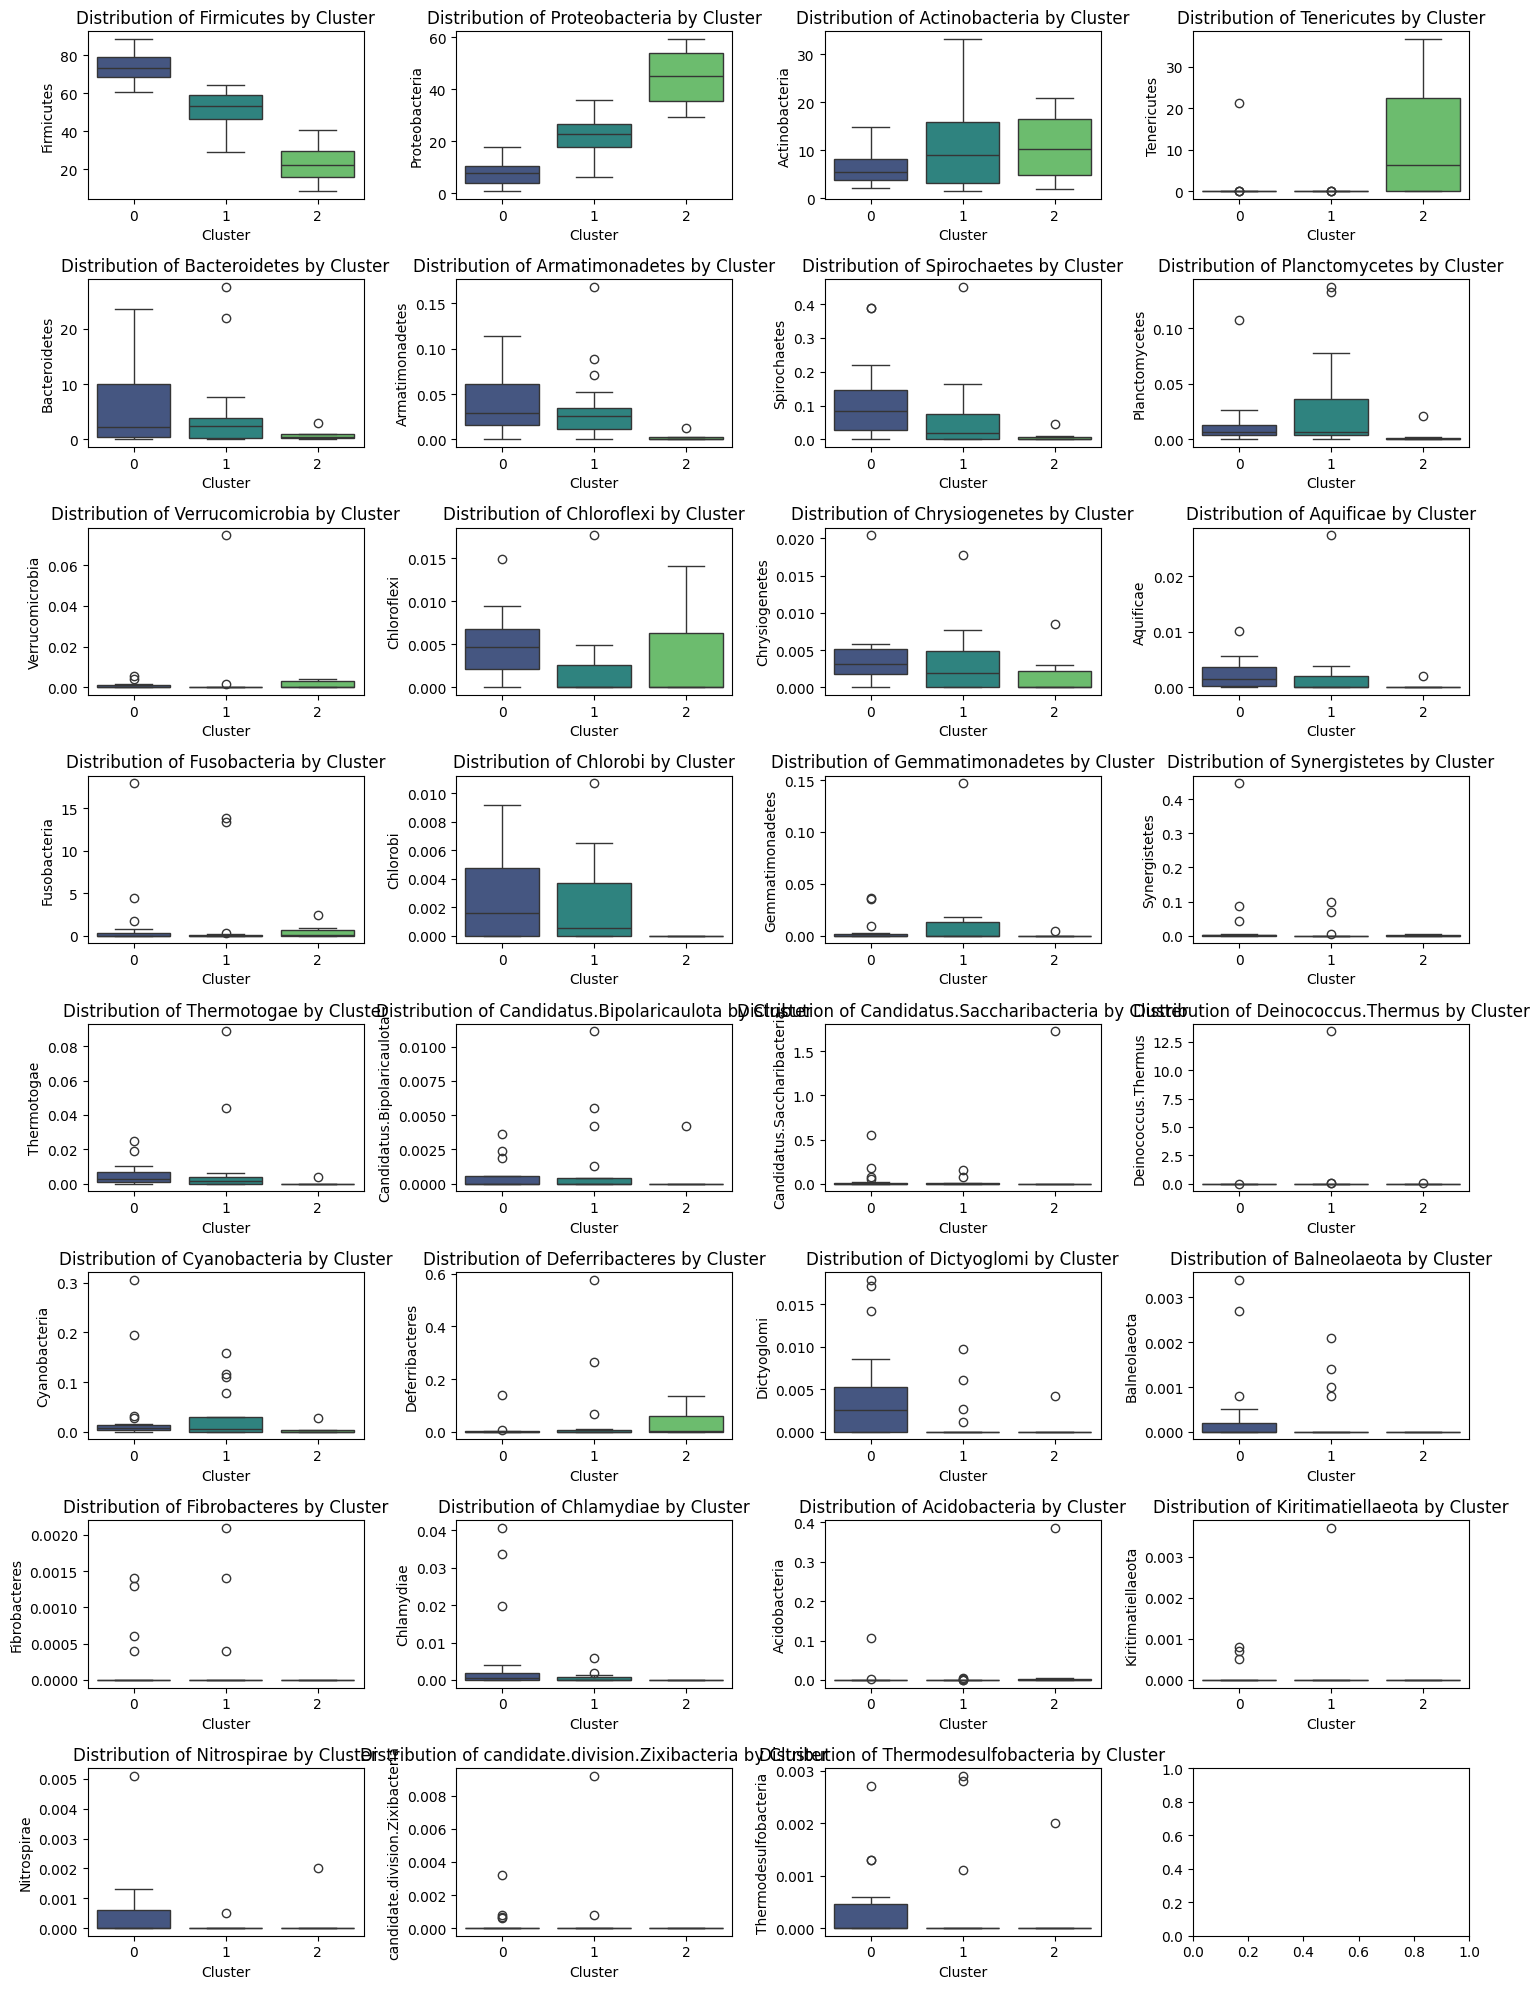

In [24]:
# Create a DataFrame with features and cluster labels
features_with_cluster = pylum_infertile

# Specify the number of rows and columns for the subplots
num_rows = 8  # Adjust based on the number of features and your preferences
num_cols = 4

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot box plots for each feature in each cluster
for i, feature in enumerate(features.columns):
    sns.boxplot(x='cluster', y=feature, data=features_with_cluster, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### KNN

In [25]:
# Assuming your data has cluster assignments in 'cluster' column
X = pylum_infertile.iloc[:, 1:]  # Features
y = pylum_infertile['cluster']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 1.0
Confusion Matrix:
[[7 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



## Fertility & Infertility

In [26]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
pylum['fertility'] = pylum['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
pylum['fertility'] = np.where(pylum['fertility'] == 'CON', 1, 0)

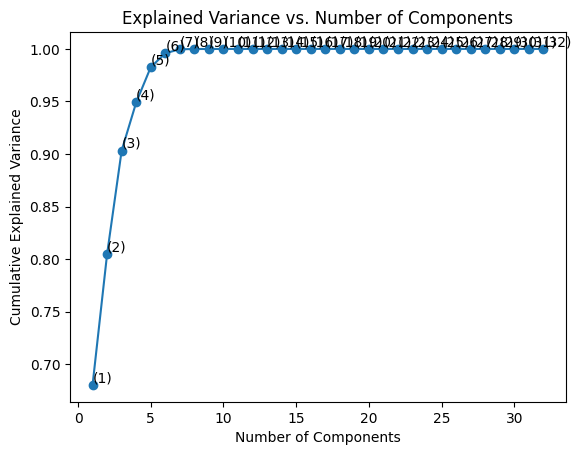

In [27]:
features = pylum.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [28]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

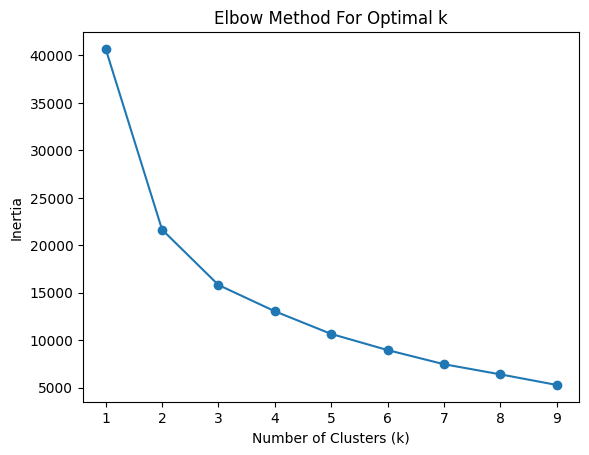

In [29]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


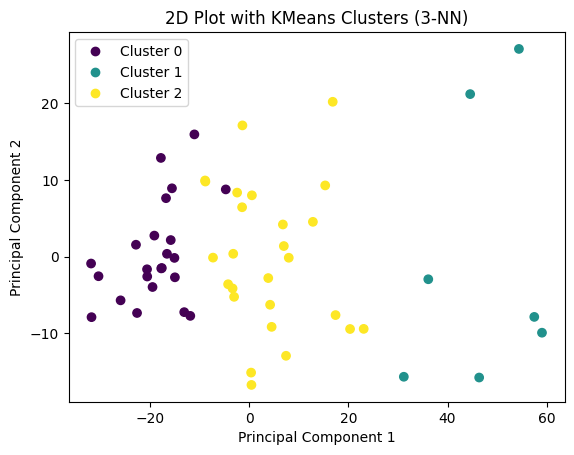

In [78]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
pylum['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

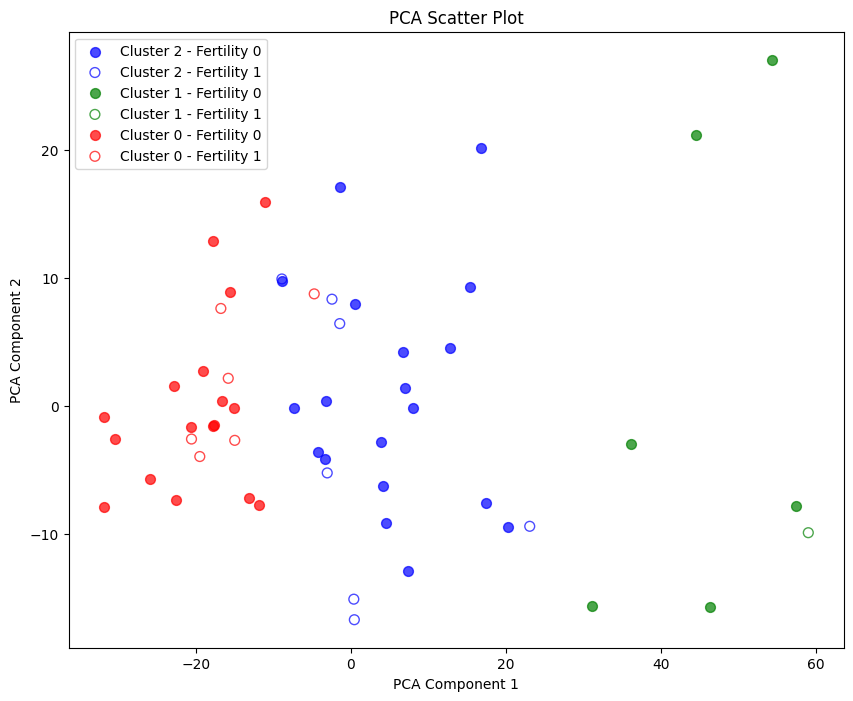

In [84]:
# Add the PCA components to the DataFrame
pylum['PCA1'] = features_pca[:, 0]
pylum['PCA2'] = features_pca[:, 1]

# Scatter plot with color based on cluster and shape based on fertility
plt.figure(figsize=(10, 8))

for cluster, color in zip(pylum['cluster'].unique(), ['blue', 'green', 'red']):
    for fertility, fill in zip(pylum['fertility'].unique(), [True, False]):
        subset = pylum[(pylum['cluster'] == cluster) & (pylum['fertility'] == fertility)]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster} - Fertility {fertility}',
                    color=color, marker='o', s=50, alpha=0.7, edgecolors=color, linewidth=1, facecolors='none' if not fill else color)

plt.title('PCA Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [31]:
pylum['cluster'].value_counts()

cluster
2    26
0    23
1     7
Name: count, dtype: int64

In [32]:
# statistics of each cluster and fertility
pylum.groupby(['cluster', 'fertility']).describe()

Firmicutes                                           \
                       count       mean        std      min       25%   
cluster fertility                                                       
0       0               17.0  75.244835   7.213205  63.0646  72.48730   
        1                6.0  70.733517   6.288153  60.8265  67.38050   
1       0                6.0  23.230717  11.595541   8.4196  16.03650   
        1                1.0  17.393700        NaN  17.3937  17.39370   
2       0               19.0  53.374700   9.287178  29.1573  46.76570   
        1                7.0  58.675814   8.359574  42.5661  55.70015   

                                                Proteobacteria             \
                        50%        75%      max          count       mean   
cluster fertility                                                           
0       0          73.99860  80.960900  88.6327           17.0   7.471406   
        1          71.83290  75.766975  76.9341            6.0   8.617183   
1       0          22.34285  29.415925  40.5710            6.0  44.704783   
        1          17.39370  17.393700  17.3937            1.0  61.718200   
2       0          53.40060  60.043650  64.3925           19.0  21.103742   
        1          60.56090  64.832700  66.5380            7.0  22.547729   

                   ... candidate.division.Zixibacteria          \
                   ...                             75%     max   
cluster fertility  ...                                           
0       0          ...                             0.0  0.0032   
        1          ...                             0.0  0.0000   
1       0          ...                             0.0  0.0000   
        1          ...                             0.0  0.0000   
2       0          ...                             0.0  0.0092   
        1          ...                             0.0  0.0000   

                  Thermodesulfobacteria                                     \
                                  count      mean       std  min  25%  50%   
cluster fertility                                                            
0       0                          17.0  0.000400  0.000738  0.0  0.0  0.0   
        1                           6.0  0.000133  0.000327  0.0  0.0  0.0   
1       0                           6.0  0.000333  0.000816  0.0  0.0  0.0   
        1                           1.0  0.000000       NaN  0.0  0.0  0.0   
2       0                          19.0  0.000358  0.000914  0.0  0.0  0.0   
        1                           7.0  0.000000  0.000000  0.0  0.0  0.0   

                                   
                      75%     max  
cluster fertility                  
0       0          0.0005  0.0027  
        1          0.0000  0.0008  
1       0          0.0000  0.0020  
        1          0.0000  0.0000  
2       0          0.0000  0.0029  
        1          0.0000  0.0000  

[6 rows x 248 columns]

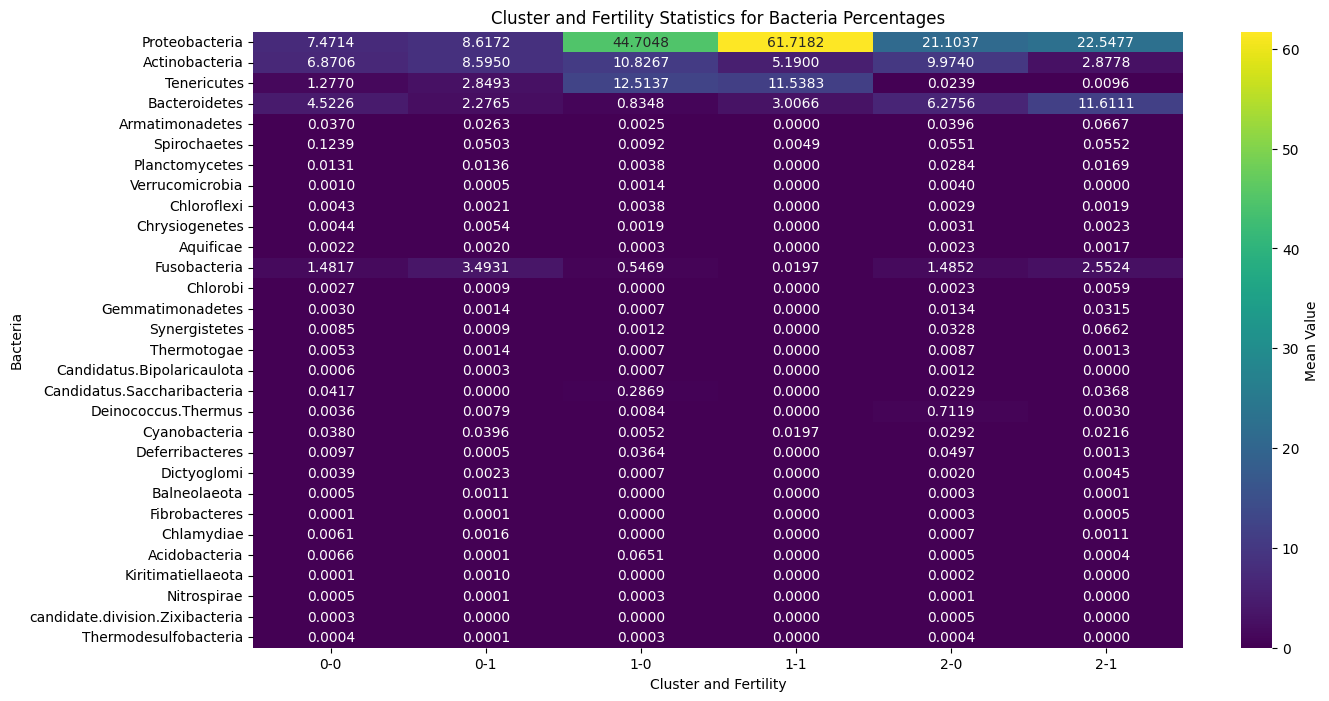

In [33]:
# Select relevant columns for visualization
columns_for_visualization = pylum.columns[2:32]  # Assuming bacteria percentage columns start from index 2

# Group by cluster and fertility, then calculate the mean for each bacteria
grouped_data = pylum.groupby(['cluster', 'fertility'])[columns_for_visualization].mean()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(grouped_data.transpose(), cmap='viridis', annot=True, fmt=".4f", cbar_kws={'label': 'Mean Value'})
plt.title('Cluster and Fertility Statistics for Bacteria Percentages')
plt.xlabel('Cluster and Fertility')
plt.ylabel('Bacteria')
plt.show()

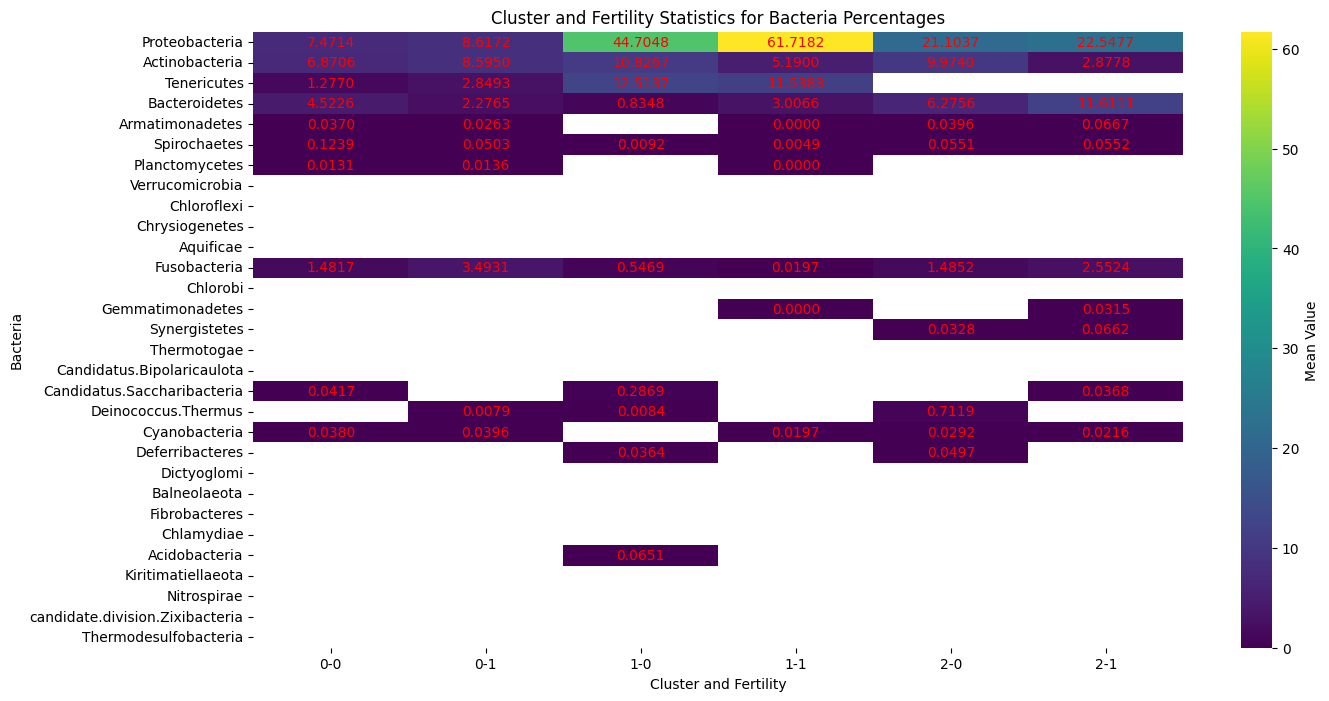

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for visualization
columns_for_visualization = pylum.columns[2:32]  # Assuming bacteria percentage columns start from index 2

# Group by cluster and fertility, then calculate the mean for each bacteria
grouped_data = pylum.groupby(['cluster', 'fertility'])[columns_for_visualization].mean()

# Identify the top 10 bacteria for each group
top_10_bacteria = grouped_data.apply(lambda x: x.argsort()[-10:], axis=1)

# Create a heatmap
plt.figure(figsize=(15, 8))

# Create a boolean mask to highlight the top 10 bacteria for each group
mask = np.zeros_like(grouped_data)
for i, bacteria in enumerate(top_10_bacteria.values):
    mask[i, bacteria] = True

# Use a different annotation color for the highlighted cells
sns.heatmap(grouped_data.transpose(), cmap='viridis', annot=True, fmt=".4f", cbar_kws={'label': 'Mean Value'},
            mask=np.logical_not(mask.transpose()), annot_kws={"color": "red"})

plt.title('Cluster and Fertility Statistics for Bacteria Percentages')
plt.xlabel('Cluster and Fertility')
plt.ylabel('Bacteria')
plt.show()


In [35]:
# Add a new column for each combination of cluster and fertility
pylum['cluster_fertility'] = pylum['cluster'].astype(str) + '_' + pylum['fertility'].astype(str)
pylum.head(5)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,fertility,cluster,cluster_fertility
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0,0.0000,0.0,0.0,0.0020,0.0,0.002,0,1,1_0
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0,0.0022,0.0,0.0,0.0007,0.0,0.000,0,2,2_0
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0,0.0407,0.0,0.0,0.0051,0.0,0.000,0,0,0_0


In [36]:
pylum['cluster_fertility'].value_counts()

cluster_fertility
2_0    19
0_0    17
2_1     7
1_0     6
0_1     6
1_1     1
Name: count, dtype: int64

### KNN

In [59]:
# Assuming your data has cluster assignments in 'cluster' column
X = pylum.iloc[:, 1:-1]  # Features

# Remove cluster and fertility columns
X.drop(['cluster', 'fertility'], axis=1, inplace=True)

y = pylum['cluster_fertility']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.75
Confusion Matrix:
[[3 0 0 0]
 [2 0 0 0]
 [0 0 6 0]
 [0 0 1 0]]
Classification Report:
              precision    recall  f1-score   support

         0_0       0.60      1.00      0.75         3
         0_1       0.00      0.00      0.00         2
         2_0       0.86      1.00      0.92         6
         2_1       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.36      0.50      0.42        12
weighted avg       0.58      0.75      0.65        12



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

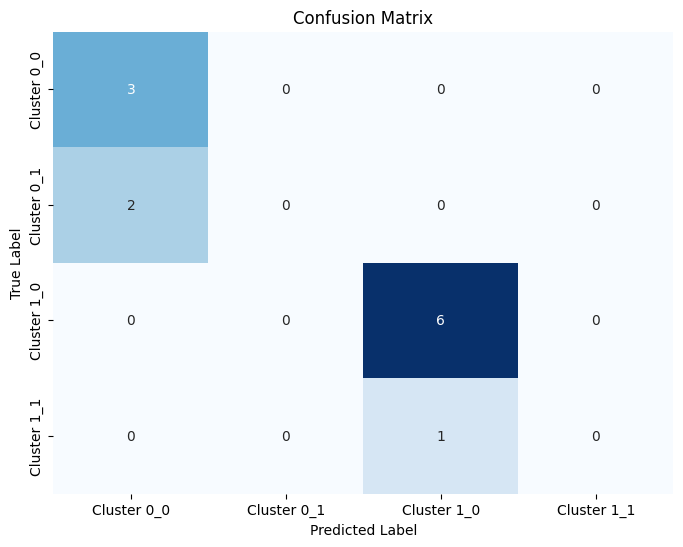

In [61]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Given a new input, mark why it is classified according to an specific cluster

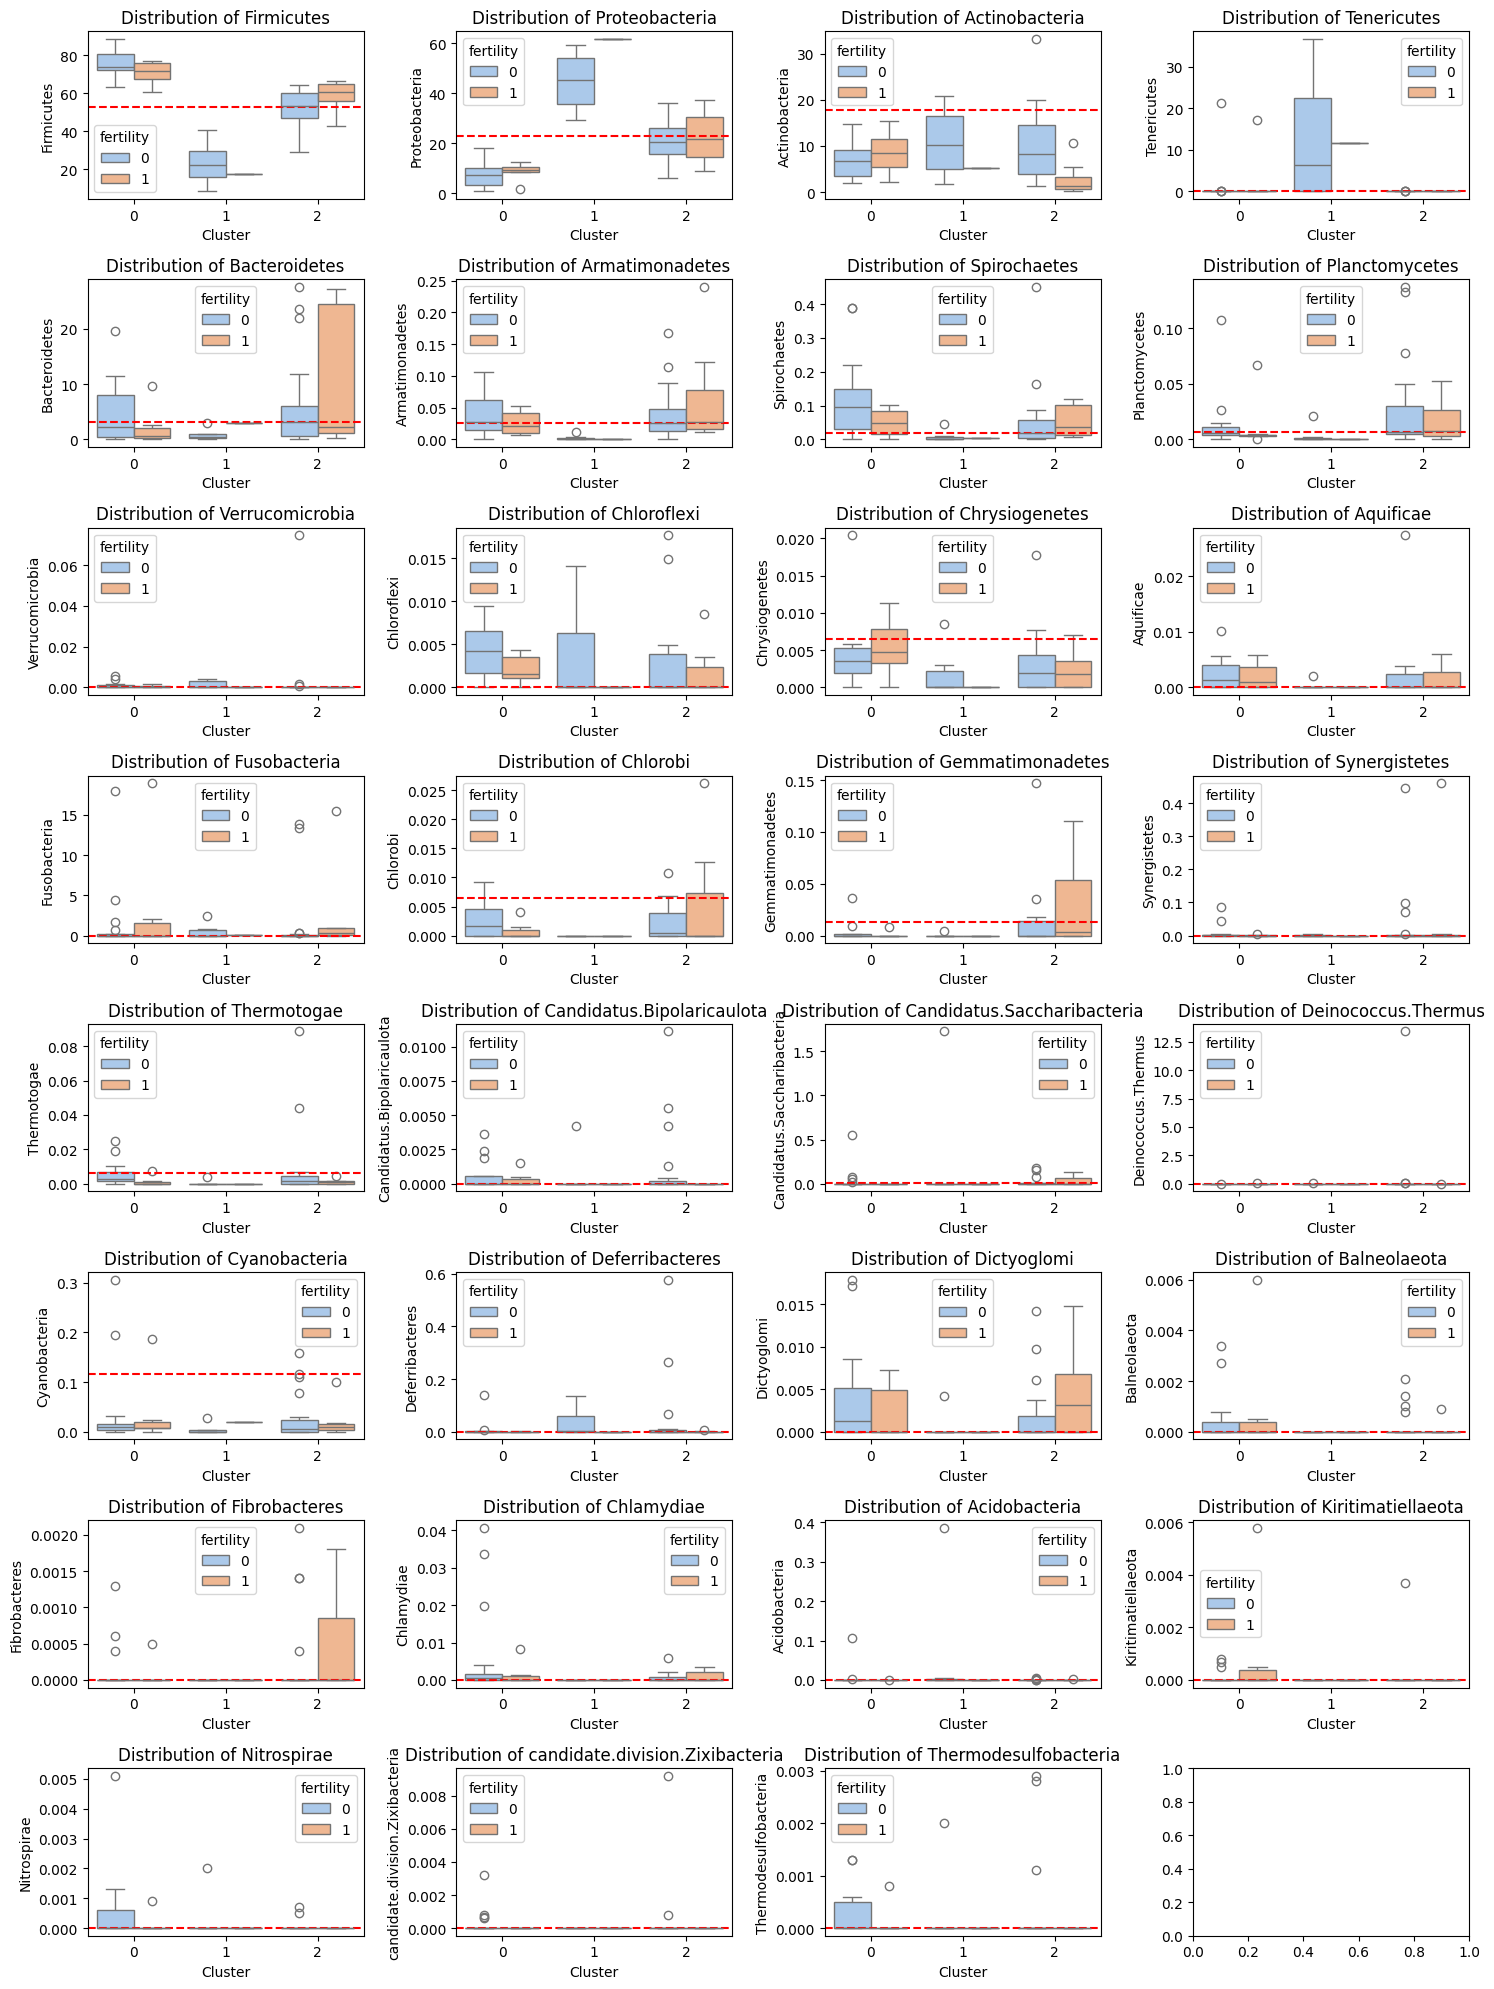

In [48]:
# Create a DataFrame with features and cluster labels
features_with_cluster = pylum

# Specify the number of rows and columns for the subplots
num_rows = 8  # Adjust based on the number of features and your preferences
num_cols = 4

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

specific_value = pylum.iloc[0, 1:32]

features = features_with_cluster.iloc[:, 1:-3]  # Features
# Plot box plots for each feature in each cluster, color-coded by fertility
for i, feature in enumerate(features.columns):
    sns.boxplot(x='cluster', y=feature, hue='fertility', data=features_with_cluster, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

    # Mark the specific value in red
    axes[i].axhline(y=specific_value[i], color='red', linestyle='--', label='Specific Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [49]:
# Print the cluster and fertility of the specific value
pylum.iloc[0, -2:]

cluster                2
cluster_fertility    2_0
Name: 0, dtype: object

In [62]:
# save the KNN model
filename = 'pylum_knn'
pickle.dump(knn, open(filename, 'wb'))

In [53]:
# save pylum df
pylum.to_csv('pylum_clusters_fertility.csv', index=False)